In [34]:
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adadelta
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Paths

In [35]:
#Ubuntu
#main_path_energy = "/home/sebastian/github/SpecialProblem_Salo/drone_irrigation_vrep/src/data_base/paths_energy/"
#main_path_total_energy = "/home/sebastian/github/SpecialProblem_Salo/drone_irrigation_vrep/src/data_base/paths_totals/"
#main_path_turns = "/home/sebastian/Desktop/"
#Windows
main_path_energy = r"C:\Users\SEBASTIAN\Documents\GitHub\problemaEspecialSalo\drone_irrigation\src\data_base\paths_energy/"
main_path_total_energy = r"C:\Users\SEBASTIAN\Documents\GitHub\problemaEspecialSalo\drone_irrigation\src\data_base\paths_totals/"

energy_path11_pd = pd.read_csv(main_path_energy + 'feat_pathv11_nuevo.csv')
energy_path12_pd = pd.read_csv(main_path_energy + 'feat_pathv12_ultimo.csv')
energy_path13_pd = pd.read_csv(main_path_energy + 'features_pathv13.csv')

energy_path_list = [energy_path11_pd,energy_path12_pd,energy_path13_pd]
complete_energy_pd = pd.concat(energy_path_list)

total_path11_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv11.csv')
total_path12_pd = pd.read_csv(main_path_total_energy + 'totalF_pathv12_ultimo.csv')
total_path13_pd = pd.read_csv(main_path_total_energy + 'totals_pathv13.csv')

total_path_list = [total_path11_pd,total_path12_pd,total_path13_pd]
complete_total_pd = pd.concat(total_path_list)

### Data split and preprocessing - complete_energy_pd - All data

this data comes from the folder "paths_energy"

In [36]:
X = complete_energy_pd.drop(columns=["missing_points","path_num","sim_drone_time","Energy","sim_point_dist","sim_Xdist","sim_Ydist","avg_error_target_dist","avg_energy"],axis=1)
y = complete_energy_pd["Energy"].to_numpy()

X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (3561, 891)


### Model - Neural network - relu and linear

In [38]:
NN_model = Sequential()

ran_initial = RandomNormal(seed=35)

NN_model.add(Dense(64,kernel_initializer=ran_initial,input_dim=5,activation='relu'))

NN_model.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))

NN_model.add(Dense(1, kernel_initializer=ran_initial,activation='linear'))

NN_model.compile(loss="mean_squared_logarithmic_error", optimizer=Adadelta(learning_rate=0.1), metrics=["mean_squared_logarithmic_error"])
NN_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_55 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 129       
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
__________________________________________________

In [39]:
model1 = NN_model.fit(x_train, y_train, epochs=300, batch_size=32, validation_split = 0.2,verbose=0)

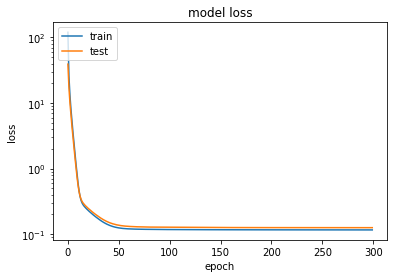

In [40]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
y_predict = NN_model.predict(x_test)
r2 = r2_score(y_test,y_predict)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MSE = mean_squared_error(y_test,y_predict)

print(f'r2: {r2}')
print(f'RMSE: {RMSE}')
print(f'MSE: {MSE}')

r2: 0.6473070743533141
RMSE: 986326.15758395
MSE: 972839289134.3188


### Data split and preprocessing - complete_energy_pd - with eps

In [42]:
eps = 5
complete_energy_pd = complete_energy_pd[(complete_energy_pd['sim_point_dist']-complete_energy_pd['teo_point_dist']) < eps]
print(f'new shape of complete_energy_pd = {complete_energy_pd.shape}')

new shape of complete_energy_pd = (3761, 14)


In [43]:
X = complete_energy_pd.drop(columns=["missing_points","path_num","sim_drone_time","Energy","sim_point_dist","sim_Xdist","sim_Ydist","avg_error_target_dist","avg_energy"],axis=1)
y = complete_energy_pd["Energy"].to_numpy()

X = X.to_numpy()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=35)

scaler2 = StandardScaler()

x_train = scaler2.fit_transform(x_train)
x_test = scaler2.transform(x_test)

print(f'Train size/Test size {len(x_train),len(x_test)}')

Train size/Test size (3008, 753)


In [53]:
NN_model11 = Sequential()

ran_initial = RandomNormal(seed=35)

NN_model11.add(Dense(64,kernel_initializer=ran_initial,input_dim=5,activation='relu'))

NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))
NN_model11.add(Dense(128,kernel_initializer=ran_initial,activation='relu'))

NN_model11.add(Dense(1, kernel_initializer=ran_initial,activation='linear'))

NN_model11.compile(loss="mean_squared_logarithmic_error", optimizer=Adadelta(learning_rate=0.2), metrics=["mean_squared_logarithmic_error"])

In [54]:
model11 = NN_model11.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.2,verbose=0)

In [55]:
y_predict = NN_model11.predict(x_test)
r2 = r2_score(y_test,y_predict)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MSE = mean_squared_error(y_test,y_predict)

print(f'r2: {r2}')
print(f'RMSE: {RMSE}')
print(f'MSE: {MSE}')

r2: 0.64237324988038
RMSE: 878232.6192108413
MSE: 771292533445.9344


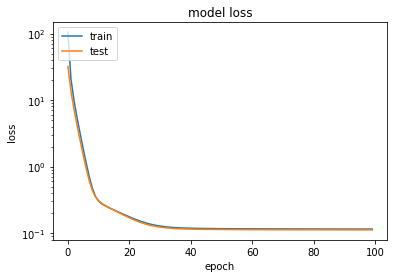

In [56]:
plt.plot(model11.history['loss'])
plt.plot(model11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model - Neural network - sigmoid and linear

In [29]:
NN_model2 = Sequential()

NN_model2.add(Dense(128,kernel_initializer='normal',input_dim=5,activation='sigmoid'))

NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))
NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))
NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))
NN_model2.add(Dense(128,kernel_initializer='normal',activation='sigmoid'))

NN_model2.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model2.compile(loss="mean_squared_logarithmic_error", optimizer=Adadelta(learning_rate=0.1), metrics=["mean_squared_logarithmic_error"])
NN_model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 129       
Total params: 66,945
Trainable params: 66,945
Non-trainable params: 0
__________________________________________________

In [30]:
model2 = NN_model2.fit(x_train, y_train, epochs=350, batch_size=32, validation_split = 0.2,verbose=0)

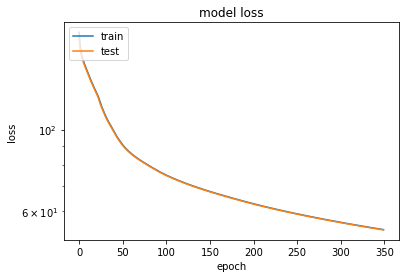

In [31]:
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale("log")
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
y_predict = NN_model2.predict(x_test)
r2 = r2_score(y_test,y_predict)
RMSE = mean_squared_error(y_test,y_predict,squared=False)
MSE = mean_squared_error(y_test,y_predict)

print(f'r2: {r2}')
print(f'RMSE: {RMSE}')
print(f'MSE: {MSE}')

r2: -1.6539289007008686
RMSE: 2332310.120849279
MSE: 5439670499815.979
